In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import visual_behavior.data_access.loading as loading
import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.utils as utils

experience_level_colors = utils.get_experience_level_colors()
cre_line_colors = utils.get_cre_line_colors()

experience_levels = utils.get_new_experience_levels()
cell_types = utils.get_cell_types()

import seaborn as sns
sns.set_context('notebook', font_scale=1, rc={'lines.markeredgewidth': 1})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from visual_behavior.dimensionality_reduction.clustering import plotting
from visual_behavior.dimensionality_reduction.clustering import processing

In [4]:
!python -m pip install git+https://github.com/nirum/jetplot


  Cloning https://github.com/nirum/jetplot to c:\users\iryna.yavorska\appdata\local\temp\pip-req-build-u3v6e4mo
  Resolved https://github.com/nirum/jetplot to commit 7e2fc15049870523acb3318a38ffeec73c0dfb67


  Running command git clone -q https://github.com/nirum/jetplot 'C:\Users\iryna.yavorska\AppData\Local\Temp\pip-req-build-u3v6e4mo'


In [5]:
import jetplot
import matplotlib.colors


### get original clustering outputs

In [6]:
glm_version = '24_events_all_L2_optimize_by_session'

In [7]:
# base_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_4'
# data_folder = '220622_across_session_norm_10_5_10'

# filename = '24_events_all_L2_optimize_by_session_feature_matrix.h5'
# feature_matrix = pd.read_hdf(os.path.join(base_dir, data_folder, filename), key='df')

# filename = 'cluster_metadata_Vip_10_Sst_5_Slc17a7_10.h5'
# df_meta = pd.read_hdf(os.path.join(base_dir, data_folder, filename))

# filename = 'cluster_labels_Vip_10_Sst_5_Slc17a7_10.h5'
# original_cluster_labels = pd.read_hdf(os.path.join(base_dir, data_folder, filename))

In [8]:
# # plot feature matrix sorted by cluster ID
# plotting.plot_feature_matrix_sorted(feature_matrix, df_meta, sort_col='cluster_id', save_dir=None,
#                                     folder=None)

### get GLM results (not across session normalized)

In [9]:
import visual_behavior_glm.GLM_fit_dev as gfd
import visual_behavior_glm.GLM_analysis_tools as gat

In [10]:
version = '24_events_all_L2_optimize_by_session'

run_params, results, results_pivoted, weights_df = gfd.load_analysis_dfs(version)

loading run_params
loading results df
loading results_pivoted df
loading weights_df


### get across session normalized dropout scores

In [11]:
import visual_behavior_glm.GLM_across_session as gas

# get across session normalized dropout scores
df, failed_cells = gas.load_cells(glm_version, clean_df=True)
df = df.set_index('identifier')

Loading list of matched cells


c:\users\iryna.yavorska\documents\github\allensdk\allensdk\api\cloud_cache\cloud_cache.py:521: OutdatedManifestWarning: You are loading visual-behavior-ophys_project_manifest_v1.0.1.json. A more up to date version of the dataset -- visual-behavior-ophys_project_manifest_v1.1.0.json -- exists online. To see the changes between the two versions of the dataset, run
VisualBehaviorOphysProjectCache.compare_manifests('visual-behavior-ophys_project_manifest_v1.0.1.json', 'visual-behavior-ophys_project_manifest_v1.1.0.json')
To load another version of the dataset, run
VisualBehaviorOphysProjectCache.load_manifest('visual-behavior-ophys_project_manifest_v1.1.0.json')
  warnings.warn(msg, OutdatedManifestWarning)


removing 1 problematic experiments
Loading across session normalized dropout scores


100%|██████████████████████████████████████████████████████████████████████████████| 3921/3921 [02:35<00:00, 25.21it/s]


0 cells could not be loaded


In [12]:
# only use across session values
across = df[[key for key in df.keys() if '_across' in key] + ['cell_specimen_id', 'ophys_experiment_id', 'experience_level']]
results_pivoted = across.copy()
# rename across session columns 
results_pivoted = results_pivoted.rename(
    columns={'omissions_across': 'omissions', 'all-images_across': 'all-images',
             'behavioral_across': 'behavioral', 'task_across': 'task'})
print(len(results_pivoted), 'len(results_pivoted)')

11763 len(results_pivoted)


### get experiment and cell metadata

In [13]:
# load experiments table
experiments_table = loading.get_platform_paper_experiment_table(limit_to_closest_active=True)
# limit to closest familiar and novel active
experiments_table = utilities.limit_to_last_familiar_second_novel_active(experiments_table)
experiments_table = utilities.limit_to_containers_with_all_experience_levels(experiments_table)

# load matched cells table
all_cells_table = loading.get_cell_table()
cells_table = loading.get_matched_cells_table(all_cells_table)
matched_cells = cells_table.cell_specimen_id.unique()
matched_experiments = cells_table.ophys_experiment_id.unique()

# get cre_lines and cell types for plot labels
cre_lines = np.sort(cells_table.cre_line.unique())
cell_types = utilities.get_cell_types_dict(cre_lines, experiments_table)

c:\users\iryna.yavorska\documents\github\allensdk\allensdk\api\cloud_cache\cloud_cache.py:521: OutdatedManifestWarning: You are loading visual-behavior-ophys_project_manifest_v1.0.1.json. A more up to date version of the dataset -- visual-behavior-ophys_project_manifest_v1.1.0.json -- exists online. To see the changes between the two versions of the dataset, run
VisualBehaviorOphysProjectCache.compare_manifests('visual-behavior-ophys_project_manifest_v1.0.1.json', 'visual-behavior-ophys_project_manifest_v1.1.0.json')
To load another version of the dataset, run
VisualBehaviorOphysProjectCache.load_manifest('visual-behavior-ophys_project_manifest_v1.1.0.json')
  warnings.warn(msg, OutdatedManifestWarning)


removing 1 problematic experiments


c:\users\iryna.yavorska\documents\github\allensdk\allensdk\api\cloud_cache\cloud_cache.py:521: OutdatedManifestWarning: You are loading visual-behavior-ophys_project_manifest_v1.0.1.json. A more up to date version of the dataset -- visual-behavior-ophys_project_manifest_v1.1.0.json -- exists online. To see the changes between the two versions of the dataset, run
VisualBehaviorOphysProjectCache.compare_manifests('visual-behavior-ophys_project_manifest_v1.0.1.json', 'visual-behavior-ophys_project_manifest_v1.1.0.json')
To load another version of the dataset, run
VisualBehaviorOphysProjectCache.load_manifest('visual-behavior-ophys_project_manifest_v1.1.0.json')
  warnings.warn(msg, OutdatedManifestWarning)


removing 1 problematic experiments
3921 cells in matched cells table


#### limit GLM results to matched cells and reformat

In [14]:
len(results_pivoted)

11763

In [15]:
# limit to matched cells 
results_pivoted = results_pivoted[results_pivoted.ophys_experiment_id.isin(matched_experiments)]
results_pivoted = results_pivoted[results_pivoted.cell_specimen_id.isin(matched_cells)]

# drop duplicates
results_pivoted = results_pivoted.drop_duplicates(subset=['cell_specimen_id', 'experience_level'])
print(len(results_pivoted), 'len(results_pivoted) after dropping duplicates')
        
print(len(results_pivoted.cell_specimen_id.unique()),
      'cells in results_pivoted after limiting to strictly matched cells')

11763 len(results_pivoted) after dropping duplicates
3921 cells in results_pivoted after limiting to strictly matched cells


In [16]:
# limit to features used for clustering
features = processing.get_features_for_clustering()
features = [*features, 'ophys_experiment_id']
results_pivoted = processing.limit_results_pivoted_to_features_for_clustering(results_pivoted, features)

# flip sign so coding scores are positive
results_pivoted = processing.flip_sign_of_dropouts(results_pivoted, processing.get_features_for_clustering(), use_signed_weights=False)

# now drop ophys_experiment_id
results_pivoted = results_pivoted.drop(columns=['ophys_experiment_id'])

In [17]:
len(results_pivoted)

11763

# cluster on all cells 

I had to pull out and adapt bits of code from VBA to run on all cre lines because most VBA code loops through cre lines within the main functions - needs to be modularized

In [18]:
base_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_4'

save_dir = os.path.join(base_dir, 'all_cre_clustering_090923_select_k')
folder = 'figs'

In [19]:
feature_matrix = processing.get_feature_matrix_for_clustering(results_pivoted, glm_version, save_dir=save_dir)

No duplicated cells found
3921


C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\pandas\io\pytables.py:314: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->integer,key->axis1] [items->None]

  f(store)


In [20]:
cell_metadata = processing.get_cell_metadata_for_feature_matrix(feature_matrix, cells_table)

3921 cells in cell_metadata for feature_matrix



## load or generate clustering results


In [21]:
def run_all_cre_clustering(feature_matrix, cells_table, n_clusters, save_dir, folder):
    cluster_meta_save_path = os.path.join(save_dir, 'cluster_meta_n_'+str(n_clusters)+'_clusters.h5')

    # if clustering output exists, load it
    if os.path.exists(cluster_meta_save_path):
        cluster_meta = pd.read_hdf(cluster_meta_save_path, key='df')
        # merge in cell metadata
        cell_metadata = processing.get_cell_metadata_for_feature_matrix(feature_matrix, cells_table)
        cell_metadata = cell_metadata.drop(columns=['ophys_experiment_id', 'cre_line'])
        cluster_meta = cluster_meta.merge(cell_metadata.reset_index(), on='cell_specimen_id')
        cluster_meta = cluster_meta.set_index('cell_specimen_id')
    # otherwise run it and save it
    else: 
        # run spectral clustering and get co-clustering matrix
        from sklearn.cluster import SpectralClustering
        sc = SpectralClustering()
        X = feature_matrix.values
        m = processing.get_coClust_matrix(X=X, n_clusters=n_clusters, model=sc, nboot=np.arange(100))
        # make co-clustering matrix a dataframe with cell_specimen_ids as indices and columns
        coclustering_df = pd.DataFrame(data=m, index=feature_matrix.index, columns=feature_matrix.index)

        # save co-clustering matrix
        coclust_save_path = os.path.join(save_dir, 'coclustering_matrix_n_'+str(n_clusters)+'_clusters.h5')
        coclustering_df.to_hdf(coclust_save_path, key='df', format='table')

        # run agglomerative clustering on co-clustering matrix to identify cluster labels
        from sklearn.cluster import AgglomerativeClustering
        X = coclustering_df.values
        cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                        linkage='average')
        labels = cluster.fit_predict(X)
        cell_specimen_ids = coclustering_df.index.values
        # make dictionary with labels for each cell specimen ID in this cre line
        labels_dict = {'labels': labels, 'cell_specimen_id': cell_specimen_ids}
        # turn it into a dataframe
        labels_df = pd.DataFrame(data=labels_dict, columns=['labels', 'cell_specimen_id'])
        # get new cluster_ids based on size of clusters and add to labels_df
        cluster_size_order = labels_df['labels'].value_counts().index.values
        # translate between original labels and new IDS based on cluster size
        labels_df['cluster_id'] = [np.where(cluster_size_order == label)[0][0] for label in labels_df.labels.values]
        # concatenate with df for all cre lines
        cluster_labels = labels_df

        # add metadata to cluster labels
        cell_metadata = processing.get_cell_metadata_for_feature_matrix(feature_matrix, cells_table)

        cluster_meta = cluster_labels[['cell_specimen_id', 'cluster_id', 'labels']].merge(cell_metadata, on='cell_specimen_id')
        cluster_meta = cluster_meta.set_index('cell_specimen_id')
        # annotate & clean cluster metadata
        cluster_meta = processing.clean_cluster_meta(cluster_meta)  # drop cluster IDs with fewer than 5 cells in them
        cluster_meta['original_cluster_id'] = cluster_meta.cluster_id

        # plot coclustering matrix - need to hack it since it assumes cre lines
        coclustering_dict = {}
        coclustering_dict['all'] = coclustering_df
        cluster_meta_tmp = cluster_meta.copy()
        cluster_meta_tmp['cre_line'] = 'all'
        plotting.plot_coclustering_matrix_sorted_by_cluster_size(coclustering_dict, cluster_meta_tmp, cre_line='all',
                                                        save_dir=save_dir, folder=folder, suffix='_'+str(n_clusters)+'_clusters', ax=None)

        # add within cluster correlation
        cluster_meta = processing.add_within_cluster_corr_to_cluster_meta(feature_matrix, cluster_meta, use_spearmanr=True)

        # plot within cluster correlations
        plotting.plot_within_cluster_correlations(cluster_meta, sort_order=None, spearman=True, suffix='_'+str(n_clusters)+'_clusters',
                                                save_dir=save_dir, folder=folder, ax=None)

        # # compute the within and acorss cluster correlations for each cell and plot the results for each cluster 
        # correlations_df = compute_within_and_across_cluster_correlations(feature_matrix, cluster_meta, save_dir=save_dir)
        # correlations_summary = correlations_df.groupby(['cell_specimen_id']).apply(get_summary_of_within_across_cluster_correlations)
        # correlations_summary.to_hdf(os.path.join(save_dir, 'correlations_summary_'+str(n_clusters)+'.h5'), key='df')
        # plot_within_across_cluster_correlations(correlations_summary, save_dir=save_dir, folder=folder)

        # save clustering results
        cluster_meta_save_path = os.path.join(save_dir, 'cluster_meta_n_'+str(n_clusters)+'_clusters.h5')
        cluster_data = cluster_meta.reset_index()[['cell_specimen_id', 'ophys_experiment_id', 'cre_line', 'cluster_id', 'labels', 'within_cluster_correlation_p', 'within_cluster_correlation_s']]
        cluster_data.to_hdf(cluster_meta_save_path, key='df', format='table')

    

    return cluster_meta



### run clustering for a range of k values and save outputs

In [25]:
range_of_k = [12,14]


In [26]:
for n_clusters in range_of_k:
    cluster_meta = run_all_cre_clustering(feature_matrix, cells_table, n_clusters, save_dir, folder)

3921 cells in cell_metadata for feature_matrix
3921 cells in cell_metadata for feature_matrix


### compute and save within and across cluster correlations

In [ ]:
correlations_df = processing.compute_within_and_across_cluster_correlations(feature_matrix, cluster_meta, save_dir=save_dir)
correlations_summary = processing.correlations_df.groupby(['cell_specimen_id']).apply(get_summary_of_within_across_cluster_correlations)
plotting.plot_within_across_cluster_correlations(correlations_summary,)


### generate for all n_clusters

In [32]:
save_dir

'\\\\allen\\programs\\braintv\\workgroups\\nc-ophys\\visual_behavior\\platform_paper_plots\\figure_4\\all_cre_clustering_090923_select_k'

3921 cells in cell_metadata for feature_matrix


C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


3921 cells in cell_metadata for feature_matrix


C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


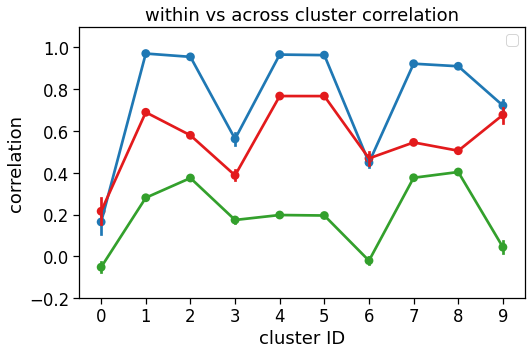

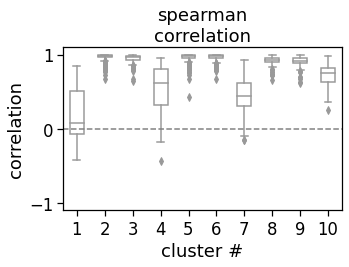

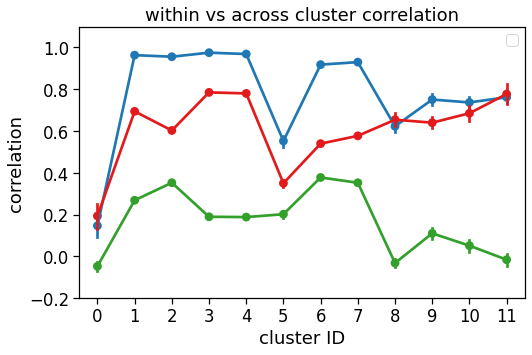

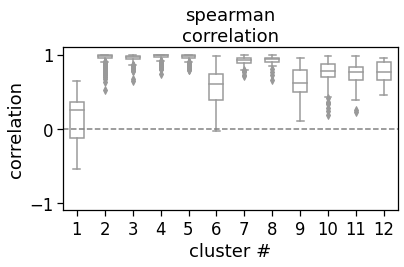

In [36]:
for n_clusters in range_of_k:
    # generate or load clustering results 
    cluster_meta = run_all_cre_clustering(feature_matrix, cells_table, n_clusters, save_dir, folder)
    # compute the within and acorss cluster correlation for each cell and plot the results for each cluster 
    correlations_df = compute_within_and_across_cluster_correlations(feature_matrix, cluster_meta, save_dir=save_dir)
    correlations_summary = correlations_df.groupby(['cell_specimen_id']).apply(get_summary_of_within_across_cluster_correlations)
    correlations_summary.to_hdf(os.path.join(save_dir, 'correlations_summary_'+str(n_clusters)+'.h5'), key='df')
    plot_within_across_cluster_correlations(correlations_summary, save_dir=save_dir, folder=folder)
    # plot within cluster correlations distribution
    plotting.plot_within_cluster_correlations(cluster_meta, sort_order=None, spearman=True, suffix='_'+str(n_clusters)+'_clusters',
                                                    save_dir=save_dir, folder=folder, ax=None)


#### get average correlations diff values for all k

In [37]:
# aggregate correlations summary values and save df since it wasnt saved the first time
correlations_summary_all_k = pd.DataFrame()
for n_clusters in range_of_k:
    # correlations_df = pd.read_hdf(os.path.join(save_dir, 'within_across_cluster_correlations'+str(n_clusters)+'.h5'), key='df')
    # correlations_summary = correlations_df.groupby(['cell_specimen_id']).apply(get_summary_of_within_across_cluster_correlations)
    # correlations_summary.to_hdf(os.path.join(save_dir, 'correlations_summary_'+str(n_clusters)+'.h5'), key='df')
    correlations_summary = pd.read_hdf(os.path.join(save_dir, 'correlations_summary_'+str(n_clusters)+'.h5'), key='df')
    # add k value and aggregate 
    correlations_summary['n_clusters'] = n_clusters
    correlations_summary_all_k = pd.concat([correlations_summary_all_k, correlations_summary])


In [38]:
sns.set_style('whitegrid')

In [39]:
mean_correlations = correlations_summary_all_k.groupby(['n_clusters']).mean().reset_index()
std_correlations = correlations_summary_all_k.groupby(['n_clusters']).std().reset_index()
snr_correlations = mean_correlations.set_index('n_clusters') / std_correlations.set_index('n_clusters')
snr_correlations

,cluster_id,within_cluster_correlation,across_cluster_correlation,correlation_diff,correlation_ratio
n_clusters,,,,,
12,1.170719,3.000281,1.369075,2.742532,0.081346
14,1.110911,3.639131,1.377839,3.174519,0.031688


In [40]:
figsize = (10,5)
sns.set_style('whitegrid')

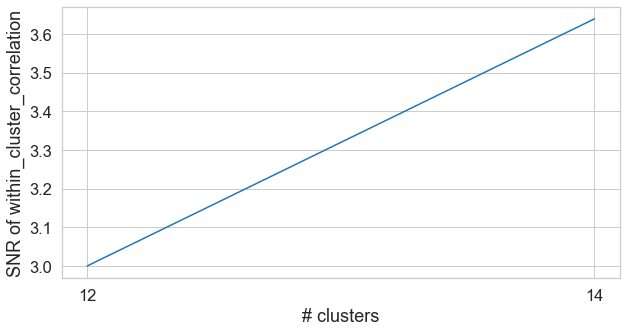

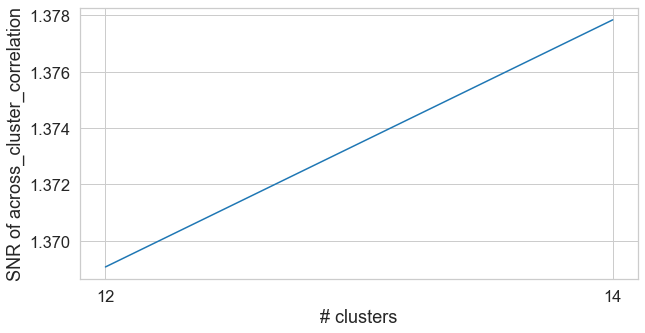

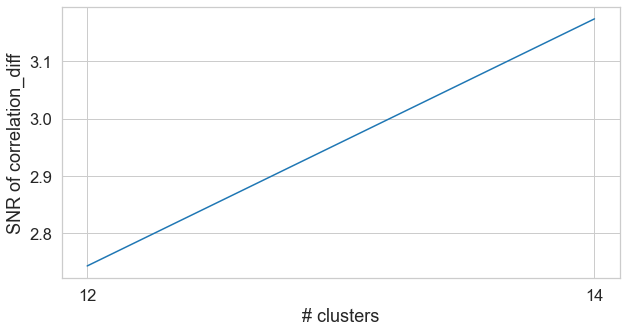

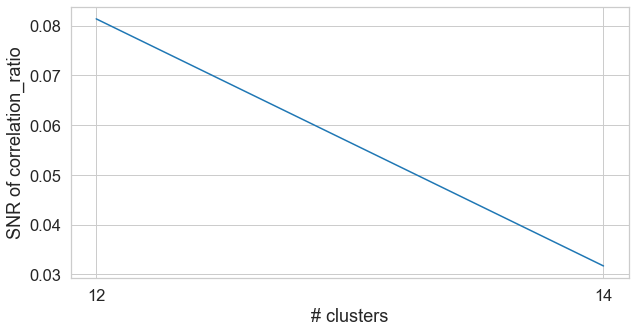

In [41]:
for column in correlations_summary_all_k.columns[1:-1]:
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(snr_correlations.index.values, snr_correlations[column].values)
    ax.set_xlabel('# clusters')
    ax.set_ylabel('SNR of '+column)
    ax.set_xticks(snr_correlations.index.values);
    # ax.axvline(x=14, ymin=0, ymax=1, linestyle='--', color='r')

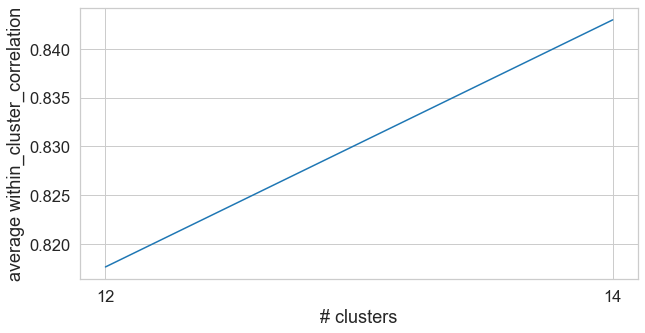

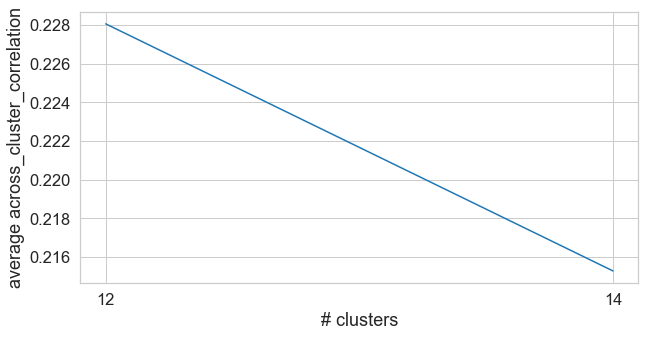

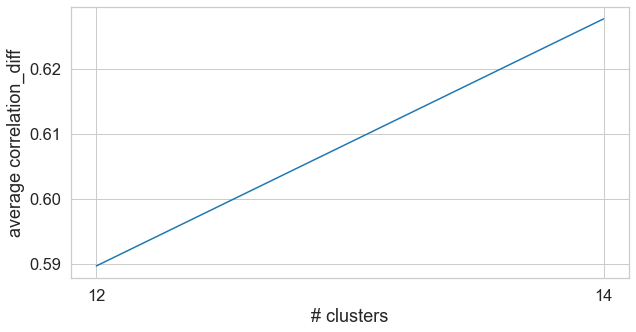

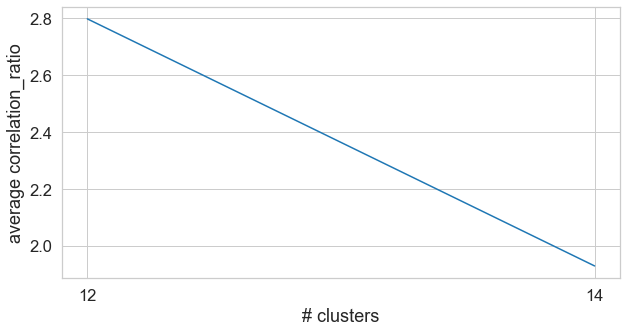

In [42]:
for column in correlations_summary_all_k.columns[1:-1]:
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(mean_correlations.n_clusters.values, mean_correlations[column].values)
    ax.set_xlabel('# clusters')
    ax.set_ylabel('average '+column)
    ax.set_xticks(correlations_summary_all_k.n_clusters.unique());

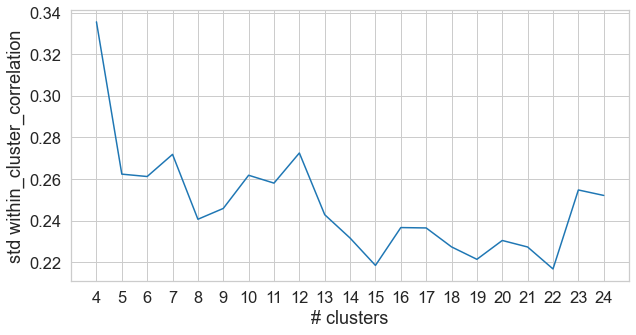

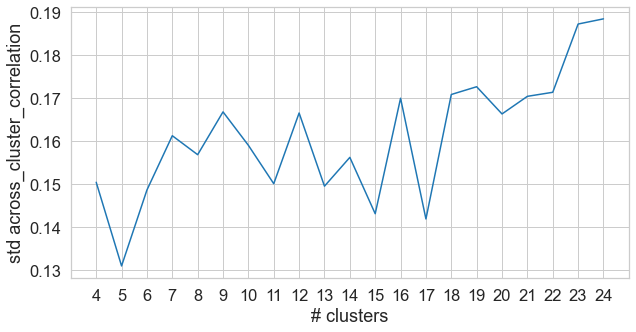

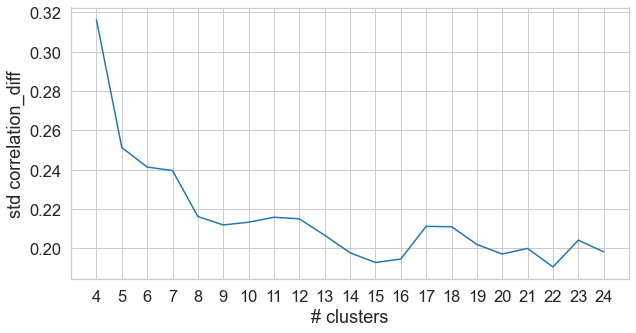

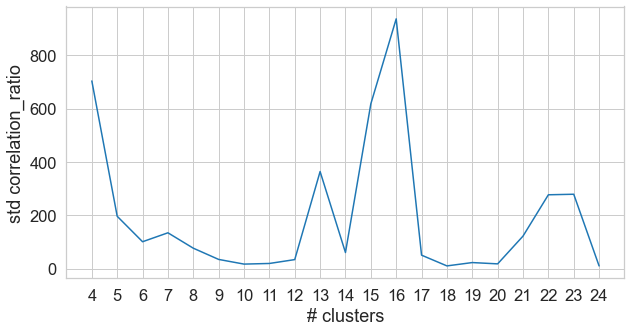

In [62]:
for column in correlations_summary_all_k.columns[1:-1]:
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(std_correlations.n_clusters.values, std_correlations[column].values)
    ax.set_xlabel('# clusters')
    ax.set_ylabel('std '+column)
    ax.set_xticks(correlations_summary_all_k.n_clusters.unique());

## Load and evaluate co-clustering probabilities and cluster correlations

### co-clustering probabilities

In [43]:
co_clust_dict = {}
for k in range_of_k:
    filepath = os.path.join(save_dir, 'coclustering_matrix_n_'+str(k)+'_clusters.h5')
    df = pd.read_hdf(filepath, key='df')
    co_clust_dict[k] = df.values

In [48]:
co_clust_dict[14]

array([[1.01010101, 0.        , 1.01010101, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.01010101, 0.        , ..., 0.        , 0.        ,
        1.01010101],
       [1.01010101, 0.        , 1.01010101, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.01010101, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.01010101,
        0.        ],
       [0.        , 1.01010101, 0.        , ..., 0.        , 0.        ,
        1.01010101]])

In [44]:
coclust = pd.DataFrame()
summary_list = []
for k in range_of_k:
    values = co_clust_dict[k].reshape(len(co_clust_dict[k])**2)
    tmp = pd.DataFrame(values, columns=['probability'])
    tmp['n_clusters'] = k
    coclust = pd.concat([coclust, tmp])
    summary = [k, np.mean(values), np.std(values)]
    summary_list.append(summary)
summary_df = pd.DataFrame(summary_list, columns=['n_clusters', 'mean', 'std'])


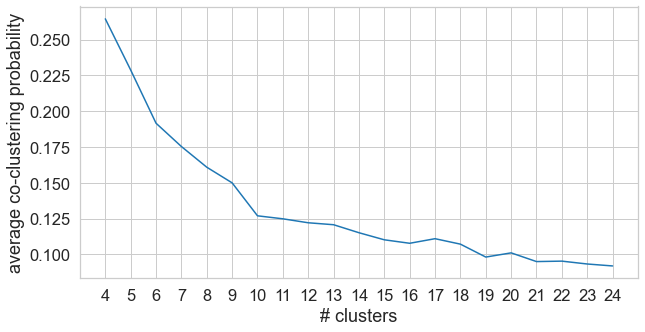

In [65]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(summary_df.n_clusters.values, summary_df['mean'].values)
ax.set_xlabel('# clusters')
ax.set_ylabel('average co-clustering probability')
ax.set_xticks(summary_df.n_clusters.unique());

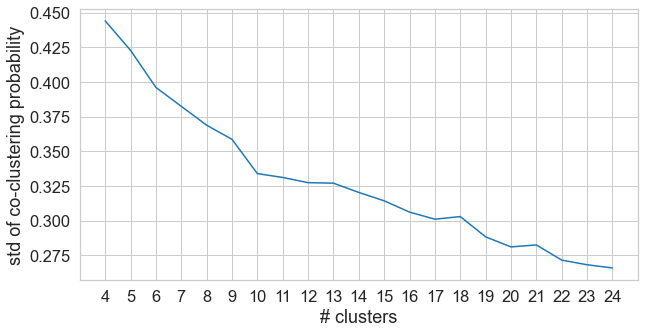

In [66]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(summary_df.n_clusters.values, summary_df['std'].values)
ax.set_xlabel('# clusters')
ax.set_ylabel('std of co-clustering probability')
ax.set_xticks(summary_df.n_clusters.unique());

### within cluster correlation

In [45]:
clust_corr_df = pd.DataFrame()
for k in range_of_k:
    filepath = os.path.join(save_dir, 'cluster_meta_n_'+str(k)+'_clusters.h5')
    df = pd.read_hdf(filepath, key='df')
    df = df.drop_duplicates(subset='cell_specimen_id')
    df['n_clusters'] = k
    clust_corr_df = pd.concat([clust_corr_df, df])

In [46]:
summary_list = []
for k in range_of_k:
    values = clust_corr_df[clust_corr_df.n_clusters==k]['within_cluster_correlation_s'].values
    tmp = pd.DataFrame(values, columns=['correlation'])
    tmp['n_clusters'] = k
    summary = [k, np.nanmean(values), np.nanstd(values)]
    summary_list.append(summary)
corr_summary_df = pd.DataFrame(summary_list, columns=['n_clusters', 'mean_corr', 'std_corr'])


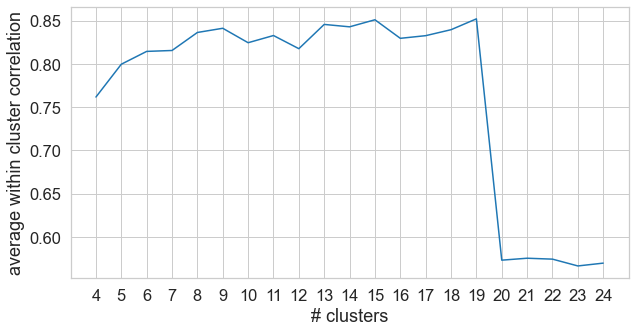

In [69]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(corr_summary_df.n_clusters.values, corr_summary_df['mean_corr'].values)
ax.set_xlabel('# clusters')
ax.set_ylabel('average within cluster correlation')
ax.set_xticks(corr_summary_df.n_clusters.unique());

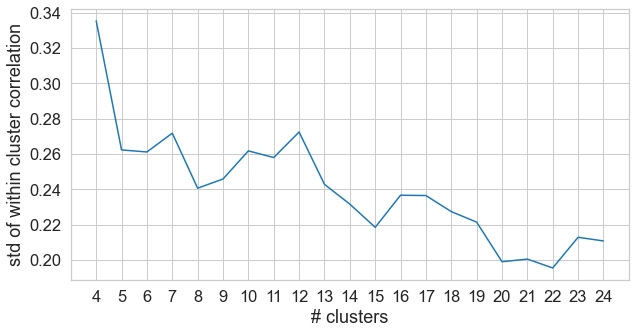

In [70]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(corr_summary_df.n_clusters.values, corr_summary_df['std_corr'].values)
ax.set_xlabel('# clusters')
ax.set_ylabel('std of within cluster correlation')
ax.set_xticks(corr_summary_df.n_clusters.unique());